# 7.2 BERT model on Yelp reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dataset import Dataset
from utils import get_splits

# Calibration analysis

In [2]:
df = pd.read_csv('data/yelp_out.csv', index_col=0)
var='Length (characters)'
df = Dataset(df, cal_size=10000)

## Uncalibrated

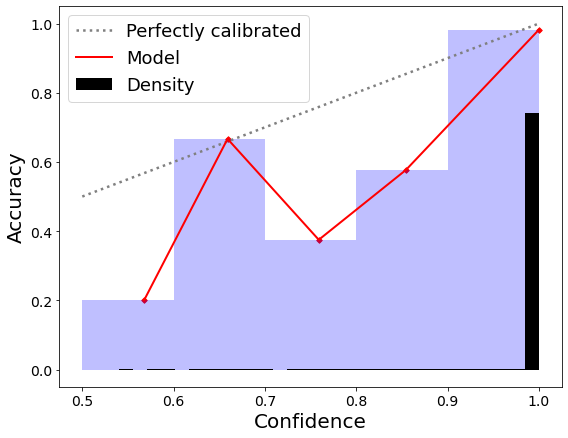

In [3]:
df.reliability_diagram(hist_weight=0.00004, filename="figs/yelp_uncal_reliability.png")

IOStream.flush timed out


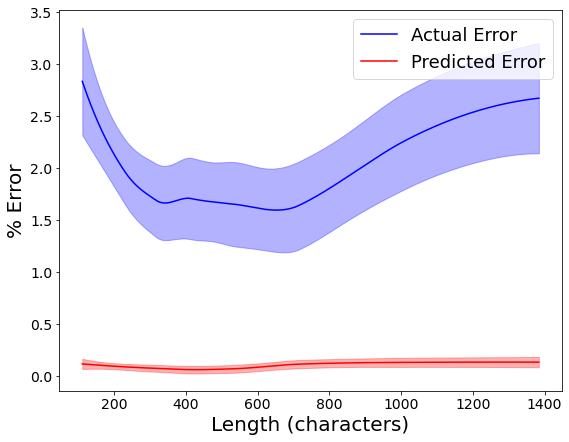

In [4]:
ylim = df.gen_plot_lowess(var=var, filename="figs/yelp_uncal_errdiff.png")

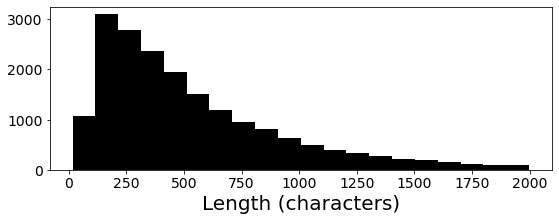

In [5]:
f, ax1 = plt.subplots(1, 1, figsize=(9,3))
ax1.hist(df.df[var], bins=20, color='black')
ax1.set_xlabel("Length (characters)", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig('figs/yelp_hist.png',bbox_inches="tight")
plt.show()

## Beta-calibrated

In [6]:
cont = ['len_char', 'stop_prop', 'named_ents']

In [7]:
for col in cont:
    print(col)
    print(df.compute_VECE(col, label="_beta"))

len_char
0.0036614509057248147
stop_prop
0.002908014602263817
named_ents
0.002123204750468755


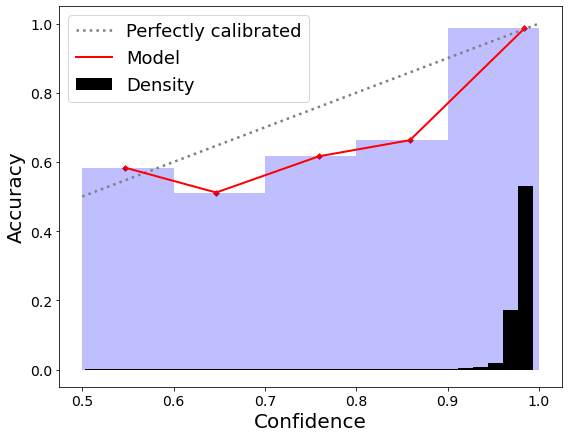

In [6]:
df.reliability_diagram(label="_beta", hist_weight=0.00004, filename="figs/yelp_beta_reliability.png")

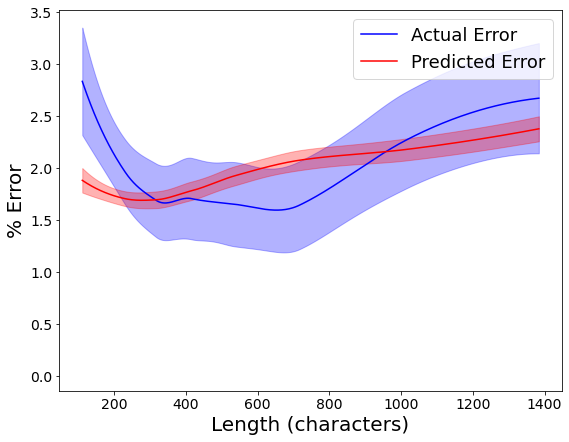

In [7]:
df.gen_plot_lowess(var=var, label="_beta", use_lim=True, ylim=ylim, filename="figs/yelp_beta_errdiff.png")

## Variable-wise calibrated

In [8]:
splits = get_splits(df.df_cal[[var]], df.df[[var]], df.df_cal['actual'], df.df['actual'],
                    max_depth=3, min_samples_leaf=int(len(df.df_cal)/10))

In [9]:
df.split_calibrate(var,splits, how='beta')

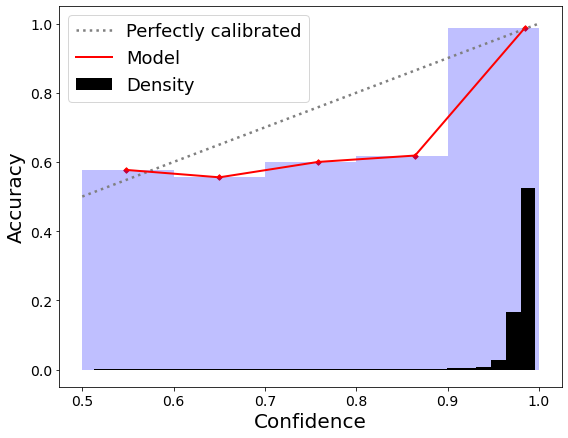

In [10]:
df.reliability_diagram(label="_split", hist_weight=0.00004, filename="figs/yelp_split_reliability.png")

IOStream.flush timed out


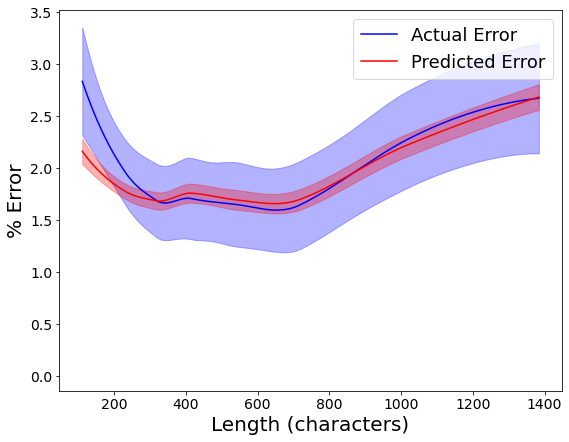

In [11]:
df.gen_plot_lowess(var=var, label="_split", use_lim=True, ylim=ylim, filename="figs/yelp_split_errdiff.png")

## Overall results

In [14]:
bins=10

In [15]:
print("uncalibrated ECE=",df.compute_ECE(num_bins=bins))
print("Kumar calibrated ECE=",df.compute_ECE(label="_kumar", num_bins=bins))
print("Logistic calibrated ECE=", df.compute_ECE(label="_log", num_bins=bins))
print("Beta calibrated ECE=", df.compute_ECE(label="_beta", num_bins=bins))
print("Variable-wise calibrated ECE=",df.compute_ECE(label="_split", num_bins=bins))

uncalibrated ECE= 0.019339917180874973
Kumar calibrated ECE= 0.042283494063998714
Logistic calibrated ECE= 0.030385557256882544
Beta calibrated ECE= 0.017331118530983916
Variable-wise calibrated ECE= 0.01704464192399016


In [16]:
print("uncalibrated VECE =",df.compute_VECE(var=var, num_bins=bins))
print("Kumar calibrated VECE =",df.compute_VECE(label="_kumar",var=var, num_bins=bins))
print("Logistic calibrated VECE =",df.compute_VECE(label="_log",var=var, num_bins=bins))
print("Beta calibrated VECE =",df.compute_VECE(label="_beta",var=var, num_bins=bins))
print("Variable-wise calibrated VECE =",df.compute_VECE(label="_split",var=var, num_bins=bins))

uncalibrated VECE = 0.01933099665039672
Kumar calibrated VECE = 0.04228349406399688
Logistic calibrated VECE = 0.006445816564265136
Beta calibrated VECE = 0.00366145090572482
Variable-wise calibrated VECE = 0.0022995678165237355
